In [3]:
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding
from matplotlib import pyplot as plt
#from ipywidgets import interact
import pickle
import math
from IPython.display import clear_output
plt.rcParams['figure.dpi'] = 200

In [4]:
all_df_norm = pd.read_csv("data/all_df_combined_norm.csv")
norm_bounds = pd.read_csv("data/norm_bounds_combined.csv")
all_df = pd.read_csv("data/all_df_combined.csv")

In [5]:
all_df_shuffled, all_df_norm_shuffled = sklearn.utils.shuffle(all_df, all_df_norm)

In [34]:
# x_labels = ["M1-PL", "M1-PR", "M2-PL", "M2-PR",
#             "M1-AL-IN-ACT", "M1-AR-IN-ACT", "M2-AL-IN-ACT", "M2-AR-IN-ACT",
#             "M1-AL-OUT", "M1-AR-OUT", "M2-AL-OUT", "M2-AR-OUT"]
# lookback = 3
# new_x_labels = []
# for i in range(lookback):
#     for l in x_labels:
#         new_x_labels.append(l + str(i))
# x_labels += new_x_labels

# y_labels = ["M1X", "M1Y", "M2X", "M2Y", "M3X", "M3Y",
#             "M4X", "M4Y", "M5X", "M5Y", "M6X", "M6Y",
#             "M7X", "M7Y", "M8X", "M8Y", "M9X", "M9Y",
#             "M10X", "M10Y"]
# #p_labels = ["5a0", "5a1", "5a2", "5a3", "5a4", "5a5", "d"]
# p_labels = ["4a0", "4a1", "4a2", "4a3", "4a4", "d"]

#bmodel
x_labels = ["M1X", "M1Y", "M2X", "M2Y", "M3X", "M3Y",
            "M4X", "M4Y", "M5X", "M5Y", "M6X", "M6Y",
            "M7X", "M7Y", "M8X", "M8Y", "M9X", "M9Y",
            "M10X", "M10Y"]
# x_labels = ["M10X", "M10Y"]
y_labels = ["M1-PL", "M1-PR", "M2-PL", "M2-PR"]

In [35]:
x_data = all_df_norm_shuffled[x_labels]
y_data = all_df_norm_shuffled[y_labels]
#p_data = all_df_norm_shuffled[p_labels]

x_dim = len(x_labels)
y_dim = len(y_labels)
#p_dim = len(p_labels)

split = int(0.8 * len(x_data))

x_train = x_data[:split]
y_train = y_data[:split]
#p_train = p_data[:split]

x_test = x_data[split:]
y_test = y_data[split:]
#p_test = p_data[split:]

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(p_train.shape)
# print(p_test.shape)

(9086, 20)
(2272, 20)
(9086, 4)
(2272, 4)


In [31]:
fmodel = Sequential()
fmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(64, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(32, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(16, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(y_dim, activation='relu'))

fmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
fmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               6272      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)               

In [32]:
%%time
historyf = fmodel.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
1136/1136 [==============================] - 1s 488us/step - loss: 0.0221 - accuracy: 0.5655
Epoch 2/100
1136/1136 [==============================] - 1s 479us/step - loss: 0.0049 - accuracy: 0.8225
Epoch 3/100
1136/1136 [==============================] - 1s 480us/step - loss: 0.0032 - accuracy: 0.8770
Epoch 4/100
1136/1136 [==============================] - 1s 484us/step - loss: 0.0027 - accuracy: 0.8934
Epoch 5/100
1136/1136 [==============================] - 1s 482us/step - loss: 0.0024 - accuracy: 0.9059
Epoch 6/100
1136/1136 [==============================] - 1s 480us/step - loss: 0.0023 - accuracy: 0.9068
Epoch 7/100
1136/1136 [==============================] - 1s 481us/step - loss: 0.0021 - accuracy: 0.9147
Epoch 8/100
1136/1136 [==============================] - 1s 480us/step - loss: 0.0020 - accuracy: 0.9122
Epoch 9/100
1136/1136 [==============================] - 1s 483us/step - loss: 0.0019 - accuracy: 0.9146
Epoch 10/100
1136/1136 [==============================]

1136/1136 [==============================] - 1s 472us/step - loss: 0.0013 - accuracy: 0.9311
Epoch 79/100
1136/1136 [==============================] - 1s 469us/step - loss: 0.0012 - accuracy: 0.9334
Epoch 80/100
1136/1136 [==============================] - 1s 471us/step - loss: 0.0012 - accuracy: 0.9299
Epoch 81/100
1136/1136 [==============================] - 1s 473us/step - loss: 0.0012 - accuracy: 0.9353
Epoch 82/100
1136/1136 [==============================] - 1s 478us/step - loss: 0.0012 - accuracy: 0.9348
Epoch 83/100
1136/1136 [==============================] - 1s 471us/step - loss: 0.0012 - accuracy: 0.9321
Epoch 84/100
1136/1136 [==============================] - 1s 470us/step - loss: 0.0012 - accuracy: 0.9336
Epoch 85/100
1136/1136 [==============================] - 1s 476us/step - loss: 0.0012 - accuracy: 0.9330
Epoch 86/100
1136/1136 [==============================] - 1s 472us/step - loss: 0.0012 - accuracy: 0.9345
Epoch 87/100
1136/1136 [==============================] - 1

In [33]:
loss, accuracy = fmodel.evaluate(x_test, y_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

71/71 [==============================] - 0s 458us/step - loss: 5.2686e-04 - accuracy: 0.9476
Loss: 0.00052686, Accuracy: 94.76


In [49]:
pmodel = Sequential()
pmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(64, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(32, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(16, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(p_dim, activation='relu'))

pmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
pmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               6272      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)               

In [50]:
history = pmodel.fit(x_train, p_train, epochs=100, batch_size=8)

Epoch 1/100
589/589 [==============================] - 1s 509us/step - loss: 0.0673 - accuracy: 0.3029
Epoch 2/100
589/589 [==============================] - 0s 527us/step - loss: 0.0149 - accuracy: 0.4435
Epoch 3/100
589/589 [==============================] - 0s 580us/step - loss: 0.0110 - accuracy: 0.5200
Epoch 4/100
589/589 [==============================] - 0s 546us/step - loss: 0.0090 - accuracy: 0.5234
Epoch 5/100
589/589 [==============================] - 0s 550us/step - loss: 0.0074 - accuracy: 0.5731
Epoch 6/100
589/589 [==============================] - 0s 562us/step - loss: 0.0066 - accuracy: 0.5773
Epoch 7/100
589/589 [==============================] - 0s 548us/step - loss: 0.0064 - accuracy: 0.5704
Epoch 8/100
589/589 [==============================] - 0s 566us/step - loss: 0.0061 - accuracy: 0.6067
Epoch 9/100
589/589 [==============================] - 0s 535us/step - loss: 0.0060 - accuracy: 0.6270
Epoch 10/100
589/589 [==============================] - 0s 474us/step - l

In [51]:
loss, accuracy = pmodel.evaluate(x_test, p_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

37/37 [==============================] - 0s 353us/step - loss: 0.0016 - accuracy: 0.7394
Loss: 0.00162089, Accuracy: 73.94


In [37]:
bmodel = Sequential()

bmodel.add(Dense(16, input_dim=x_dim, activation='relu'))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(16, activation='relu'))
bmodel.add(Dropout(0.2))

# bmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
# bmodel.add(Dropout(0.2))
# bmodel.add(Dense(64, activation='relu'))
# bmodel.add(Dropout(0.2))
# bmodel.add(Dense(32, activation='relu'))
# bmodel.add(Dropout(0.2))
# bmodel.add(Dense(16, activation='relu'))
# bmodel.add(Dropout(0.2))


bmodel.add(Dense(y_dim, activation='relu'))

bmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
bmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                336       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 4)                 68        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [41]:
%%time
historyb = bmodel.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
1136/1136 [==============================] - 0s 387us/step - loss: 0.0121 - accuracy: 0.6361
Epoch 2/100
1136/1136 [==============================] - 0s 380us/step - loss: 0.0120 - accuracy: 0.6266
Epoch 3/100
1136/1136 [==============================] - 0s 379us/step - loss: 0.0122 - accuracy: 0.6183
Epoch 4/100
1136/1136 [==============================] - 0s 381us/step - loss: 0.0118 - accuracy: 0.6309
Epoch 5/100
1136/1136 [==============================] - 0s 380us/step - loss: 0.0119 - accuracy: 0.6206
Epoch 6/100
1136/1136 [==============================] - 0s 380us/step - loss: 0.0120 - accuracy: 0.6344
Epoch 7/100
1136/1136 [==============================] - 0s 382us/step - loss: 0.0118 - accuracy: 0.6249
Epoch 8/100
1136/1136 [==============================] - 0s 381us/step - loss: 0.0120 - accuracy: 0.6306
Epoch 9/100
1136/1136 [==============================] - 0s 390us/step - loss: 0.0120 - accuracy: 0.6266
Epoch 10/100
1136/1136 [==============================]

1136/1136 [==============================] - 0s 379us/step - loss: 0.0116 - accuracy: 0.6506
Epoch 79/100
1136/1136 [==============================] - 0s 374us/step - loss: 0.0114 - accuracy: 0.6654
Epoch 80/100
1136/1136 [==============================] - 0s 381us/step - loss: 0.0113 - accuracy: 0.6553
Epoch 81/100
1136/1136 [==============================] - 0s 372us/step - loss: 0.0117 - accuracy: 0.6485
Epoch 82/100
1136/1136 [==============================] - 0s 371us/step - loss: 0.0114 - accuracy: 0.6322
Epoch 83/100
1136/1136 [==============================] - 0s 371us/step - loss: 0.0115 - accuracy: 0.6356
Epoch 84/100
1136/1136 [==============================] - 0s 375us/step - loss: 0.0114 - accuracy: 0.6436
Epoch 85/100
1136/1136 [==============================] - 0s 372us/step - loss: 0.0114 - accuracy: 0.6296
Epoch 86/100
1136/1136 [==============================] - 0s 372us/step - loss: 0.0113 - accuracy: 0.6410
Epoch 87/100
1136/1136 [==============================] - 0

In [42]:
loss, accuracy = bmodel.evaluate(x_test, y_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

71/71 [==============================] - 0s 439us/step - loss: 0.0110 - accuracy: 0.6338
Loss: 0.01098492, Accuracy: 63.38


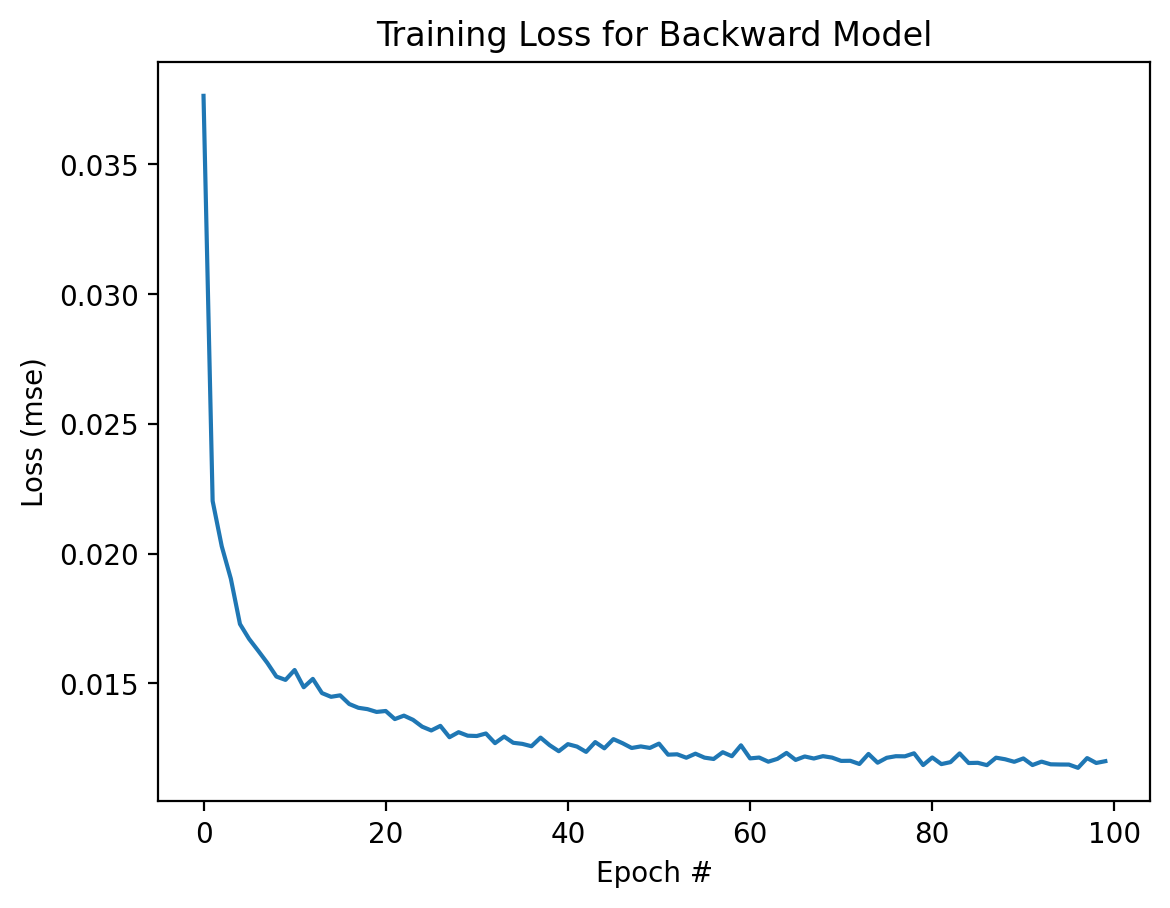

In [40]:
#plt.plot(historyf.history["loss"], label="Forward Model")
plt.plot(historyb.history["loss"], label="Backward Model")
#plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss (mse)")
plt.title("Training Loss for Backward Model")
plt.savefig("data/training_backward.png")

In [18]:
import pickle

In [36]:
pickle.dump( historyb, open( "/Volumes/Flash/basic_bmodel/training/basic_model_history.p", "wb" ) )

INFO:tensorflow:Assets written to: ram://b850d07e-bbf1-433b-8508-a11b584734f2/assets


In [40]:
pickle.dump( y_train, open( "/Volumes/Flash/basic_bmodel/data/y_train.p", "wb" ) )

In [14]:
def rescale(data, labels):
    ndata = []
    for idx, label in enumerate(labels):
        d = data[idx]
        min_val = norm_bounds.loc[0, label]
        max_val = norm_bounds.loc[1, label]
        rescaled_d = (d * (max_val - min_val)) + min_val
        ndata.append(rescaled_d)
    return np.array(ndata)

In [25]:
num_tests = len(x_test)
def evaluate_markers(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = fmodel.predict(x_select)
    cp = rescale(y_pred[0], y_labels)
    ct = all_df.loc[index, y_labels].to_numpy()
    
    xp = [0]
    xt = [0]
    yp = [0]
    yt = [0]
    
    for i in range(len(cp)):
        if i%2 == 0:
            xp.append(cp[i])
            xt.append(ct[i])
        else:
            yp.append(cp[i])
            yt.append(ct[i])
    
    plt.plot(xt, yt, "-o", label="actual")
    plt.plot(xp, yp, "-o", label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers")
    plt.show()
        
interact(evaluate_markers)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_markers(idx=(0, 1177, 1))>

In [41]:
bmodel.save("/Volumes/Flash/basic_bmodel/")

INFO:tensorflow:Assets written to: /Volumes/Flash/basic_bmodel/assets


In [42]:
num_tests = len(x_test)
def evaluate_markers(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    print(x_select)
    print(x_select.shape)
    y_pred = bmodel.predict(x_select)
    pp = rescale(y_pred[0], y_labels)
    pt = all_df.loc[index, y_labels].to_numpy()
    print(pp)
    print(pt)
    plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
    plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
    plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
    plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
    plt.ylim([95,120])
    plt.xlim([0.5,4.5])
    plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
    plt.legend()
    plt.xlabel("Pressure Sensor")
    plt.ylabel("Pressure Value (kPa)")
    plt.show()
        
interact(evaluate_markers)

interactive(children=(IntSlider(value=337, description='idx', max=674), Output()), _dom_classes=('widget-inter…

<function __main__.evaluate_markers(idx=(0, 674, 1))>

In [53]:
num_tests = len(x_test)
def evaluate_polynomial(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    p_pred = pmodel.predict(x_select)
    pp = rescale(p_pred[0], p_labels)
    pt = all_df.loc[index, p_labels].to_numpy()
    
    ap = np.flip(pp[:-1])
    dp = pp[-1]
    at = np.flip(pt[:-1])
    dt = pt[-1]
    
    polyp = np.poly1d(ap)
    polyt = np.poly1d(at)
    
    yp = np.linspace(0, dp)
    xp = polyp(yp)
    
    yt = np.linspace(0, dt)
    xt = polyt(yt)
    
    
    plt.plot(xt, yt, label="actual")
    plt.plot(xp, yp, label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers")
    plt.show()
        
interact(evaluate_polynomial)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_polynomial(idx=(0, 1177, 1))>

In [239]:
errors = []
for idx in range(len(x_test)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = bmodel.predict(x_select)
    y_pred = rescale(y_pred[0], y_labels)
    y_select = all_df.loc[index, y_labels].to_numpy()
    diff = (y_pred - y_select)
    mse = (diff * diff).sum() / len(y_labels)
    rmse = math.sqrt(mse)
    errors.append((rmse, index))

In [240]:
errors.sort()
print(errors)

[(0.17643722095964845, 4737), (0.2404698760713898, 1861), (0.2479439627935668, 2173), (0.2499304887335812, 1354), (0.2650153252643931, 1856), (0.2688337018332872, 1346), (0.2692322425323736, 4743), (0.2769129198152134, 4732), (0.28104447216944295, 1345), (0.28414439588116885, 1864), (0.28658783596682935, 357), (0.28707523466751317, 361), (0.29953379479733505, 527), (0.3024703001614707, 1855), (0.3068469189300886, 4928), (0.30744530055261793, 1865), (0.31283164069003516, 2175), (0.33019380312828084, 356), (0.35316948636241957, 4729), (0.36580152650676584, 4748), (0.37234539874976, 526), (0.3787737718283444, 365), (0.3801790502986576, 4750), (0.3866639593695742, 1394), (0.3956887714947093, 1339), (0.39594465940239665, 3827), (0.40776154017357386, 4752), (0.4105926089743889, 1870), (0.4144442481018433, 2170), (0.4222002739147648, 1397), (0.4257751428510726, 1369), (0.4276871563005507, 5705), (0.4375153319823841, 5704), (0.44958191327041336, 637), (0.4513606588605776, 1952), (0.45386086912

In [141]:
num_tests = len(x_test)
def evaluate_sort_markers(idx=(0,num_tests-1,1)):
    index = errors[idx][1]
    err = errors[idx][0]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = fmodel.predict(x_select)
    cp = rescale(y_pred[0], y_labels)
    ct = all_df.loc[index, y_labels].to_numpy()
    
    xp = [0]
    xt = [0]
    yp = [0]
    yt = [0]
    
    for i in range(len(cp)):
        if i%2 == 0:
            xp.append(cp[i])
            xt.append(ct[i])
        else:
            yp.append(cp[i])
            yt.append(ct[i])
    
    plt.plot(xt, yt, "-o", label="actual")
    plt.plot(xp, yp, "-o", label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers. RMSE: " + str(round(err,5)) + "cm")
    plt.show()
        
interact(evaluate_sort_markers)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_sort_markers(idx=(0, 1177, 1))>

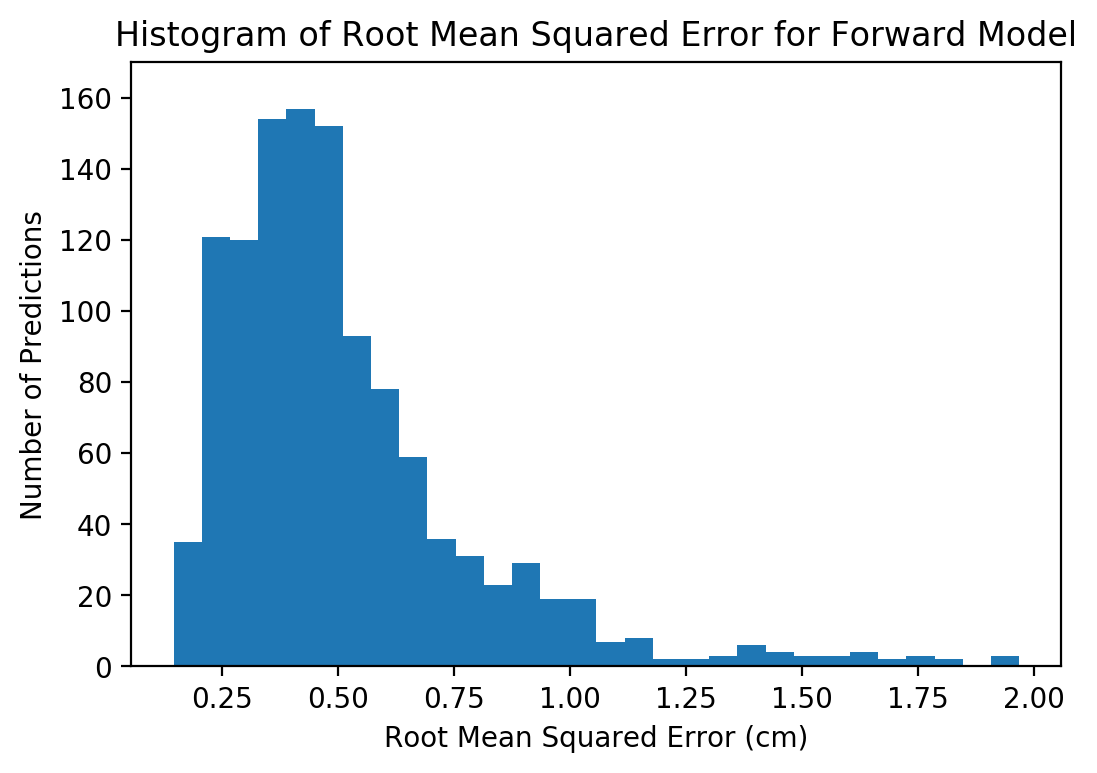

In [234]:
just_errors = []
for e in errors:
    just_errors.append(e[0])
plt.hist(just_errors, bins=30)
plt.title("Histogram of Root Mean Squared Error for Forward Model")
plt.ylim([0,170])
plt.ylabel("Number of Predictions")
plt.xlabel("Root Mean Squared Error (cm)")
plt.savefig("data/forward_error_histogram.png")

5431
data/good9_570_2.png


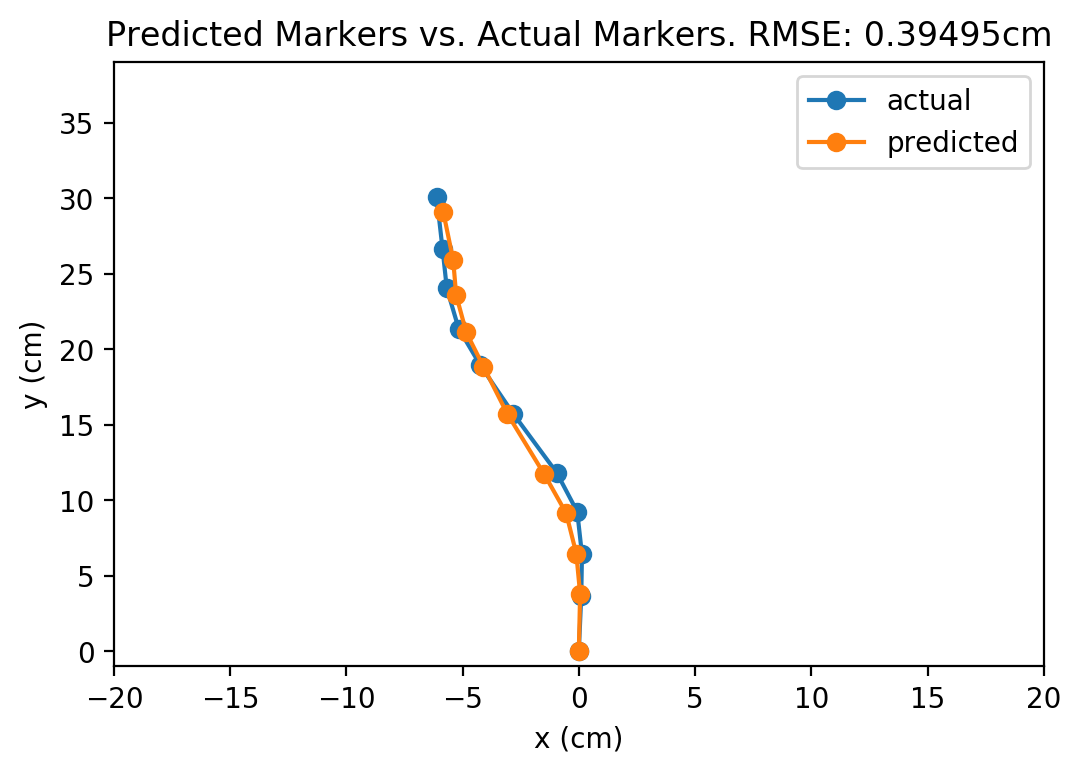

In [162]:
file_index = 9
data_index = 570
for idx, e in enumerate(errors):
    index = errors[idx][1]
    file_index_temp = all_df.loc[index, "file_index"]
    data_index_temp = all_df.loc[index, "data_index"]
    if file_index_temp == file_index and data_index_temp == data_index:
        break
#idx = 1157
index = errors[idx][1]
err = errors[idx][0]
print(index)
x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
y_pred = fmodel.predict(x_select)
cp = rescale(y_pred[0], y_labels)
ct = all_df.loc[index, y_labels].to_numpy()

xp = [0]
xt = [0]
yp = [0]
yt = [0]

for i in range(len(cp)):
    if i%2 == 0:
        xp.append(cp[i])
        xt.append(ct[i])
    else:
        yp.append(cp[i])
        yt.append(ct[i])

plt.plot(xt, yt, "-o", label="actual")
plt.plot(xp, yp, "-o", label="predicted")
plt.xlim([-20,20])
plt.ylim([-1,39])
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.legend()
plt.title("Predicted Markers vs. Actual Markers. RMSE: " + str(round(err,5)) + "cm")
pd.set_option("display.max_rows", None, "display.max_columns", None)
file_index = all_df.loc[index, "file_index"]
data_index = all_df.loc[index, "data_index"]
fname = "data/good" + str(file_index) + "_" + str(data_index) + "_2.png"
print(fname)
plt.savefig(fname)

In [81]:
print(len(x_train))

4708


In [176]:
num_tests = len(x_test)
def evaluate_sort_pressures(idx=(0,num_tests-1,1)):
    index = errors[idx][1]
    err = errors[idx][0]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = bmodel.predict(x_select)
    pp = rescale(y_pred[0], y_labels)
    pt = all_df.loc[index, y_labels].to_numpy()
    print(pp)
    print(pt)
    plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
    plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
    plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
    plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
    plt.ylim([95,120])
    plt.xlim([0.5,4.5])
    plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
    plt.xlabel("Pressure Sensor")
    plt.ylabel("Pressure Value (kPa)")
    plt.legend()
    plt.title("Predicted Pressures vs. Actual Pressures. RMSE: " + str(round(err,3)) + "kPa")
    plt.show()
        
interact(evaluate_sort_pressures)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_sort_pressures(idx=(0, 1177, 1))>

In [13]:
# file_index = 9
# data_index = 570
# for idx, e in enumerate(errors):
#     index = errors[idx][1]
#     file_index_temp = all_df.loc[index, "file_index"]
#     data_index_temp = all_df.loc[index, "data_index"]
#     if file_index_temp == file_index and data_index_temp == data_index:
#         break
idx = 1177
print(idx)
index = errors[idx][1]
err = errors[idx][0]
print(index)
x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
y_pred = bmodel.predict(x_select)
pp = rescale(y_pred[0], y_labels)
pt = all_df.loc[index, y_labels].to_numpy()
print(pp)
print(pt)
plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
plt.ylim([95,120])
plt.xlim([0.5,4.5])
plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
plt.xlabel("Pressure Sensor")
plt.ylabel("Pressure Value (kPa)")
plt.legend()
plt.title("Predicted Pressures vs. Actual Pressures. RMSE: " + str(round(err,3)) + "kPa")
pd.set_option("display.max_rows", None, "display.max_columns", None)
file_index = all_df.loc[index, "file_index"]
data_index = all_df.loc[index, "data_index"]
fname = "data_pressures/bad" + str(file_index) + "_" + str(data_index) + ".png"
print(fname)
plt.savefig(fname)

1177


NameError: name 'errors' is not defined

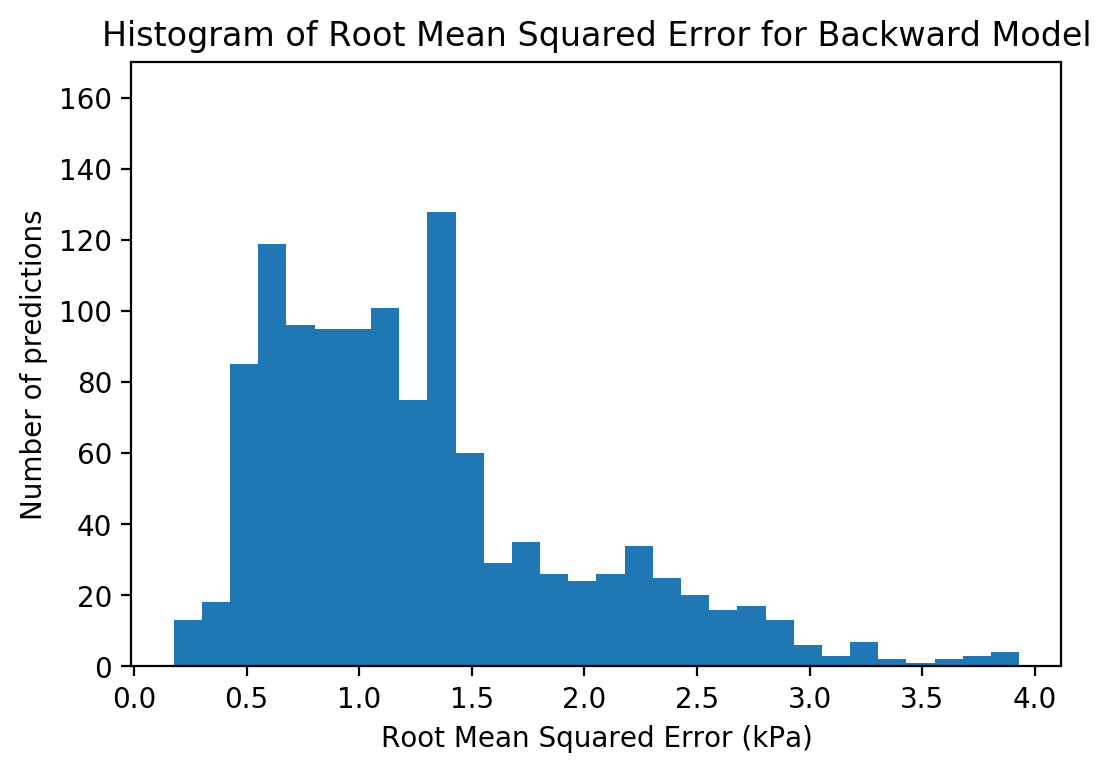

In [242]:
just_errors = []
for e in errors:
    just_errors.append(e[0])
plt.hist(just_errors, bins=30)
plt.title("Histogram of Root Mean Squared Error for Backward Model")
plt.ylim([0,170])
plt.ylabel("Number of predictions")
plt.xlabel("Root Mean Squared Error (kPa)")
plt.savefig("data/backward_error_histogram.png")